# 3D Hand Posture Recognition Project#

__Name:__ Zexi Ye

__Project Name:__ Hand Posture Project

__Date of Completion:__ 12/03/2018

__Goal:__ Using machine learning methods to classify hand postures

__Introduction:__

In this project, we will use two feature engineering methods and a number of machine learning methods to build predictive classifiers that aim to classify the type of hand posture given the 3-D coordinates of the points in the instances. There are 5 classes of hand posture, which is our target variable.

The dataset at hand consists of 78,095 observations in a file called "postures.csv". Each observation has a class field, labeled from 1 to 5, a user field, and 12 points in a three-dimensional coordinate system given in the form $(X_{i}, Y_{i}, Z_{i})$. Note that a significant number of points are missing in the given dataset, which will be addressed accordingly. In addition, the points do not follow any meaningful order. For instance, the first point $(X_{1}, Y_{1}, Z_{1})$ in observation 1 does not necessarily have correspondance to the first point $(X_{1}, Y_{1}, Z_{1})$ in observation 2, which is another caveat.

The goal is to develop a number of machine learning models that are able to accurately classify new observations in the presence of the aforementioned issues.

__Feature Engineering Methods:__

Two feature engineering methods will be used in this project. The methods are

   _A) Aggregate features_
   
   _B) Pseudo-rasterized features_

Details about the feature generating processes will be provided in later sections.

__Machine Learning Methods:__

For each feature engineering method, we will apply the following machine learning methods to construct our classifiers:

   _1) Naive Bayes_
   
   _2) Linear Discriminant Analysis (LDA)_
   
   _3) Quadratic Discriminant Analysis (QDA)_
   
   _4) Support Vector Machine (SVM)_
   
   _5) Decision Tree_
   
   _6) K-Nearest Neighbors (K-NN)_


# STAGE I: DATA CLEANING

## Overview

In this section, we will read in the dataset and clean the data.

Note that the data have two issues. First, it has an extraneous row at the beginning. Second, the missing values are marked as a "?" in the entries. We will address each issue accordingly. In particular, we will remove the first row and replace "?" with NaN.

In [1]:
import numpy as np
import pandas as pd

# Read in the data

mydata = pd.read_csv("Postures.csv")

# Drop the first row

mydata.drop(0, inplace=True)

# Replace "?" with NaN
mydata.replace('?', np.NaN, inplace=True)

# Change the types of columns that contain coordinates into float
mydata.X3 = mydata.X3.astype(float)
mydata.Y3 = mydata.Y3.astype(float)
mydata.Z3 = mydata.Z3.astype(float)
mydata.X4 = mydata.X4.astype(float)
mydata.Y4 = mydata.Y4.astype(float)
mydata.Z4 = mydata.Z4.astype(float)
mydata.X5 = mydata.X5.astype(float)
mydata.Y5 = mydata.Y5.astype(float)
mydata.Z5 = mydata.Z5.astype(float)
mydata.X6 = mydata.X6.astype(float)
mydata.Y6 = mydata.Y6.astype(float)
mydata.Z6 = mydata.Z6.astype(float)
mydata.X7 = mydata.X7.astype(float)
mydata.Y7 = mydata.Y7.astype(float)
mydata.Z7 = mydata.Z7.astype(float)
mydata.X8 = mydata.X8.astype(float)
mydata.Y8 = mydata.Y8.astype(float)
mydata.Z8 = mydata.Z8.astype(float)
mydata.X9 = mydata.X9.astype(float)
mydata.Y9 = mydata.Y9.astype(float)
mydata.Z9 = mydata.Z9.astype(float)
mydata.X10 = mydata.X10.astype(float)
mydata.Y10 = mydata.Y10.astype(float)
mydata.Z10 = mydata.Z10.astype(float)
mydata.X11 = mydata.X11.astype(float)
mydata.Y11 = mydata.Y11.astype(float)
mydata.Z11 = mydata.Z11.astype(float)

mydata.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
mydata.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3       float64
Y3       float64
Z3       float64
X4       float64
Y4       float64
Z4       float64
X5       float64
Y5       float64
Z5       float64
X6       float64
Y6       float64
Z6       float64
X7       float64
Y7       float64
Z7       float64
X8       float64
Y8       float64
Z8       float64
X9       float64
Y9       float64
Z9       float64
X10      float64
Y10      float64
Z10      float64
X11      float64
Y11      float64
Z11      float64
dtype: object

# STAGE II: FEATURE ENGINEERING

## Overview
In this section, we will generate features that will be used to build our classifiers. Two feature engineering approaches will be employed, each having a subsection exclusively devoted to it.

## Method I: Aggregate Features

Due to the fact that the points across the observations are unordered, it does not make sense to apply machine learning algorithms directly upon the raw data, otherwise it would erroneously assume that each point has a supposed correspondance and lead to confusion.

Therefore, a collection of aggregate features will be created in order to avoid the false correspondance issue above. We will extract the general information about each observation from the dataset and build our classifiers upon it. Specifically, the following features will be created:

   _1) Number of markers_
   
   _2) Mean in each dimension (X, Y and Z)_
   
   _3) Variance and covariance between each dimension_
   
   _4) Dimension of the bounding box_

Additionally, we will also consider adding interaction terms to our features, based on the performance of the validation dataset.


__Rationale:__


The rationale for using these 4 sets of features is that, after eyeballing the dataset, I observe that the number of markers is somewhat correlated with the class of the markers, as some classes tend to have more missing points than others. Moreover, I expect that the mean, variance and covariance will display a systematically different patterns across different classes due to the shape of each type of hand posture. Finally, the degree of expansiveness might differ among different types of hand postures, so the dimension of the bounding box, computed by the 1D distance between the two farthest points in each dimension, is included here.

In [3]:
# 1) Number of markers

def num_marker(df):
    return int((sum(pd.notna(df)) - 2) /3)

num_mark = mydata.apply(num_marker, axis=1)
mydata['num_mark'] = num_mark


Knowing the number of markers that each observation has, we are able to further clean the data. Specifically, we now group the data by num_mark and Class and remove observations that have too many missing coordinates, i.e. too few number of markers.

In [4]:
grp = mydata.groupby([mydata.num_mark, mydata.Class])
grp.size()

num_mark  Class
3         1          661
          3           22
          4            1
          5            6
4         1         1414
          2           28
          3          942
          4            5
          5           41
5         1         4999
          2           41
          3         4634
          4          191
          5           38
6         1         6552
          2          148
          3         4323
          4         1560
          5          242
7         1         2587
          2           93
          3         2867
          4         7251
          5          506
8         1            4
          2          118
          3         3475
          4         3418
          5         1365
9         2         1026
          3           81
          4         2336
          5         3153
10        2         3000
          4           13
          5         6202
11        1           48
          2        10493
          5         4180
12       

Here we observe that groups with a number of markers 3 or 4 contain a relatively small number of instances compared to the size of the entire dataset. Thus, we drop observations with less than or equal to 4 markers since a number of markers too small is not sufficiently informative for training our predictive models.

In [5]:
# Drop instances with num_mark <= 4

mydata = mydata[mydata.num_mark > 4]
mydata.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11,num_mark
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [8]:
# 2) Mean in each dimension

# Mean of X coordinates


x_col = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
df_x = mydata[x_col]
x_mean = df_x.apply(np.nanmean, axis=1)
mydata['x_mean'] = x_mean

# Mean of Y coordinates


y_col = ['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11']
df_y = mydata[y_col]
y_mean = df_y.apply(np.nanmean, axis=1)
mydata['y_mean'] = y_mean

# Mean of Z coordinates


z_col = ['Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11']
df_z = mydata[z_col]
z_mean = df_z.apply(np.nanmean, axis=1)
mydata['z_mean'] = z_mean

mydata.head()

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X10,Y10,Z10,X11,Y11,Z11,num_mark,x_mean,y_mean,z_mean
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,5,62.440317,54.807598,-67.097888
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,5,64.785121,55.647991,-64.209132
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,5,64.162415,55.873836,-64.771039
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,5,63.439104,55.151830,-65.928355
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,NaN,NaN,NaN,5,63.189702,54.832340,-66.390470


In [11]:
# 3) Variance and Covariance

# Variances of X

x_var = df_x.apply(lambda t: np.nanvar(t, ddof=1), axis=1)
mydata['x_var'] = x_var

# Variances of Y

y_var = df_y.apply(lambda t: np.nanvar(t, ddof=1), axis=1)
mydata['y_var'] = y_var

# Variances of Z

z_var = df_z.apply(lambda t: np.nanvar(t, ddof=1), axis=1)
mydata['z_var'] = z_var

mydata.head()

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,X11,Y11,Z11,num_mark,x_mean,y_mean,z_mean,x_var,y_var,z_var
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,5,62.440317,54.807598,-67.097888,368.120574,816.727481,74.897086
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,5,64.785121,55.647991,-64.209132,364.625268,809.982596,78.885669
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,5,64.162415,55.873836,-64.771039,369.632067,813.945768,74.420553
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,5,63.439104,55.151830,-65.928355,377.415042,810.107918,66.130036
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,NaN,NaN,NaN,5,63.189702,54.832340,-66.390470,381.445880,812.447612,63.733840


In [14]:
# Define a function that computes the covariance between two variables

def cov(x, y):
    x2 = x.dropna()
    y2 = y.dropna()
    temp = 0
    x2_mean = x2.mean()
    y2_mean = y2.mean()
    for i in range(x2.size):
        temp += (x2.iloc[i] - x2_mean)*(y2.iloc[i] - y2_mean)
    return temp / (x2.size - 1)
        
# Covariances between X and Y
def xy_c(df):
    return cov(df[x_col], df[y_col])

xy_cov = mydata.apply(xy_c, axis=1)
mydata['xy_cov'] = xy_cov

# Covariances between X and Z
def xz_c(df):
    return cov(df[x_col], df[z_col])

xz_cov = mydata.apply(xz_c, axis=1)
mydata['xz_cov'] = xz_cov

# Covariances between Y and Z
def yz_c(df):
    return cov(df[y_col], df[z_col])

yz_cov = mydata.apply(yz_c, axis=1)
mydata['yz_cov'] = yz_cov

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [8]:
mydata.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,num_mark,x_mean,y_mean,z_mean,x_var,y_var,z_var,xy_cov,xz_cov,yz_cov
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,5,62.440317,54.807598,-67.097888,368.120574,816.727481,74.897086,-142.510146,-150.851339,147.356460
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,5,64.785121,55.647991,-64.209132,364.625268,809.982596,78.885669,-144.142900,-152.345094,155.512996
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,5,64.162415,55.873836,-64.771039,369.632067,813.945768,74.420553,-152.368059,-151.848714,146.664366
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,5,63.439104,55.151830,-65.928355,377.415042,810.107918,66.130036,-161.489736,-148.939518,128.851696
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,5,63.189702,54.832340,-66.390470,381.445880,812.447612,63.733840,-159.889770,-146.701673,126.648243


In [16]:
x_dim = df_x.apply(lambda t: t.max() - t.min(), axis=1)
mydata['x_dim'] = x_dim


/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
mydata.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,x_mean,y_mean,z_mean,x_var,y_var,z_var,xy_cov,xz_cov,yz_cov,x_dim
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,62.440317,54.807598,-67.097888,368.120574,816.727481,74.897086,-142.510146,-150.851339,147.356460,48.611035
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,64.785121,55.647991,-64.209132,364.625268,809.982596,78.885669,-144.142900,-152.345094,155.512996,48.314895
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,64.162415,55.873836,-64.771039,369.632067,813.945768,74.420553,-152.368059,-151.848714,146.664366,48.846584
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,63.439104,55.151830,-65.928355,377.415042,810.107918,66.130036,-161.489736,-148.939518,128.851696,49.758767
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,63.189702,54.832340,-66.390470,381.445880,812.447612,63.733840,-159.889770,-146.701673,126.648243,50.192930


In [18]:
# 4) Dimension of the bounding box

# The length of each dimension is defined by the distance between the two furthest points on the specified axis.

# X Dimension

x_dim = df_x.apply(lambda t: t.max() - t.min(), axis=1)
mydata['x_dim'] = x_dim

# Y Dimension

y_dim = df_y.apply(lambda t: t.max() - t.min(), axis=1)
mydata['y_dim'] = y_dim

# Z Dimension

z_dim = df_z.apply(lambda t: t.max() - t.min(), axis=1)
mydata['z_dim'] = z_dim

mydata.head()

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,z_mean,x_var,y_var,z_var,xy_cov,xz_cov,yz_cov,x_dim,y_dim,z_dim
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-67.097888,368.120574,816.727481,74.897086,-142.510146,-150.851339,147.356460,48.611035,71.001621,20.764858
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-64.209132,364.625268,809.982596,78.885669,-144.142900,-152.345094,155.512996,48.314895,70.758611,21.107482
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-64.771039,369.632067,813.945768,74.420553,-152.368059,-151.848714,146.664366,48.846584,70.837907,20.532085
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-65.928355,377.415042,810.107918,66.130036,-161.489736,-148.939518,128.851696,49.758767,70.618101,19.475677
5,1,0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-66.390470,381.445880,812.447612,63.733840,-159.889770,-146.701673,126.648243,50.192930,70.715764,19.098996


Now we create a separate data frame specifically to construct classifiers upon the aggregate features. We name it data_ag.

In [19]:
data_ag = mydata[['Class', 'User', 'num_mark', 'x_mean', 'y_mean', 'z_mean', 'x_var', 'y_var', 'z_var', 'xy_cov', 'xz_cov', 'yz_cov', 'x_dim', 'y_dim', 'z_dim']]

data_ag.head()

,Class,User,num_mark,x_mean,y_mean,z_mean,x_var,y_var,z_var,xy_cov,xz_cov,yz_cov,x_dim,y_dim,z_dim
1,1,0,5,62.440317,54.807598,-67.097888,368.120574,816.727481,74.897086,-142.510146,-150.851339,147.356460,48.611035,71.001621,20.764858
2,1,0,5,64.785121,55.647991,-64.209132,364.625268,809.982596,78.885669,-144.142900,-152.345094,155.512996,48.314895,70.758611,21.107482
3,1,0,5,64.162415,55.873836,-64.771039,369.632067,813.945768,74.420553,-152.368059,-151.848714,146.664366,48.846584,70.837907,20.532085
4,1,0,5,63.439104,55.151830,-65.928355,377.415042,810.107918,66.130036,-161.489736,-148.939518,128.851696,49.758767,70.618101,19.475677
5,1,0,5,63.189702,54.832340,-66.390470,381.445880,812.447612,63.733840,-159.889770,-146.701673,126.648243,50.192930,70.715764,19.098996


For future use, we save data_ag as a csv file with name data_ag.csv.

In [97]:
data_ag.to_csv('data_ag.csv')

## Method 2: Pseudo-Rasterized Features

In this method, the 3D space will be "rasterized" (called "pseudo-rasterization") into a 3D grid of spheres with the same radius, where adjacent spheres may have some overlap. Each sphere has an associated value, $f_{i}$, that is dictated by the distance between points that fall into the sphere and the center of the sphere. These values will be our features that are used to build classifiers.

We notate the parameters of the feature engineering by the following:

$m =$ number of spheres in each dimension

$r =$ radius of each sphere

$i =$ i-th feature function

where

$m \in \{3, 4, 5\}$,

$r \in \{2, 3, 4\}$,

$i \in \{1, 2, 3\}$

The feature functions are given by

$\eqalignno{f_{1}(x)&=\cases{1\ {\rm if}\ x< r,\cr 0\ {\rm otherwise},}&{\hbox{(1)}}\cr f_{2}(x)&=\max\left[1-{x\over r}, 0\right],&{\hbox{(2)}}\cr f_{3}(x)&=\exp\left[-{\sigma^2\over 2}({x\over r})^{2}\right],&{\hbox{(3)}}}$

Note that in case (3), $\sigma$ is an arbitrary number. We will set it to 3 throughout the feature generating process.



So our feature engineering will follow the steps below:

  _1) Normalize the points in each observation so that, in each dimension, the mean equals 0 and the variance equals 1._
  
  _2) For each combination of m and r, calculate the coordinates of the centers of spheres and store them in a data structure._
  
  _3) For each type of feature function $f_{i}$, calculate the feature values in each feature. Note that, for each combination of m, r and i, there will be $m^{3}$ spheres and thus $m^{3}$ feature values._
    

__Rationale:__

The rationale for the pseudo-rasterized feature engineering method is, to some extent, similar to that in the aggregate feature, in that we aim to tackle the issue of unorderedness in the points. Nevertheless, in contrast to the previous method, which completely ignores the structure of the points and only keeps the general information, this method strives to reconstruct an ordered space that leverages the structural information contained in the raw data. In other words, this method attempts to establish correspondance that the raw data fail to record.

Pseudo-rasterization, therefore, is expected to capture the intrinsic correspondance between a certain type of hand posture and the spatial pattern associated with it.

In [43]:
# 1) Standardize the points

# Define a helper function to calculate the standardized value
def calc_standard(X):
    result = (X - np.nanmean(X, axis=0))/np.nanstd(X, axis=0)
    return result

# Standardize the x-coordinates

x_standardized = calc_standard(df_x)
y_standardized = calc_standard(df_y)
z_standardized = calc_standard(df_z)

In [57]:
# Create a temporary dataframe temp_df that contains Class, User and standardized coordinates

temp_df = mydata[['Class', 'User']]

temp_df = temp_df.merge(x_standardized, left_index=True, right_index=True)
temp_df = temp_df.merge(y_standardized, left_index=True, right_index=True)
temp_df = temp_df.merge(z_standardized, left_index=True, right_index=True)

temp_df.head()

,Class,User,X0,X1,X2,X3,X4,X5,X6,X7,...,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
1,1,0,0.113198,0.831117,-0.353128,1.079107,0.315037,NaN,NaN,NaN,...,-0.659049,-1.202521,-1.079845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,0.182046,-0.322580,0.903161,1.144046,0.385126,NaN,NaN,NaN,...,-1.143622,-1.119679,-1.011974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0.161436,-0.357631,0.880389,1.126030,0.388018,NaN,NaN,NaN,...,-1.162820,-1.131753,-1.013675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,0.145613,-0.401229,1.112438,0.387279,0.846755,NaN,NaN,NaN,...,-1.207405,-1.071100,-1.099554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0,0.139918,-0.413024,0.837177,1.112372,0.376008,NaN,NaN,NaN,...,-1.217239,-1.168065,-1.024406,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Define the three feature value functions fi

# The passed-in parameters are:

    # x_p: x-coordinate of the point
    # y_p: y-coordinate of the point
    # z_p: z-coordinate of the point
    # x_c: x-coordinate of the center of sphere
    # y_c: y-coordinate of the center of sphere
    # z_c: z-coordinate of the center of sphere
    # r: radius of the sphere

# Define f1
def f1(x_p, y_p, z_p, x_c, y_c, z_c, r):
    if np.sqrt((x_p - x_c)**2 + (y_p - y_c)**2 + (z_p - z_c)**2) < r:
        return 1
    return 0

# Define f2
def f2(x_p, y_p, z_p, x_c, y_c, z_c, r):
    x = np.sqrt((x_p - x_c)**2 + (y_p - y_c)**2 + (z_p - z_c)**2)
    return max(1 - x/r, 0)

# Define f3
def f3(x_p, y_p, z_p, x_c, y_c, z_c, r):
    x = np.sqrt((x_p - x_c)**2 + (y_p - y_c)**2 + (z_p - z_c)**2)
    return np.exp(-9/2 * (x/r)**2)


Here we summarize the procedures of generating the pseudo-rasterization features.

   _a) For each m, we first compute the 3D coordinates of the centers of all spheres. There are $m^{3}$ centers of sphere and thus $m^{3}$ features._
    
   _b) Compute the feature values by applying the functions f1, f2 and f3 to each normalized point in an observation for different r's._
    
   _c) Store the features into a separate data frame_
    
   _d) Repeat a), b) and c) for all values of m_
 
 

Prior to the feature engineering stage, we first populate all the NaN with a sufficiently large number so that the missing point would always be treated as a point outside any spheres and have an associated feature value of 0. Here we use the value 99999 to fill the NaNs.

In [59]:
# Fill all NaN's with 99999
temp_df.fillna(99999, inplace=True)
temp_df.head()

,Class,User,X0,X1,X2,X3,X4,X5,X6,X7,...,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
1,1,0,0.113198,0.831117,-0.353128,1.079107,0.315037,99999.0,99999.0,99999.0,...,-0.659049,-1.202521,-1.079845,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
2,1,0,0.182046,-0.322580,0.903161,1.144046,0.385126,99999.0,99999.0,99999.0,...,-1.143622,-1.119679,-1.011974,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
3,1,0,0.161436,-0.357631,0.880389,1.126030,0.388018,99999.0,99999.0,99999.0,...,-1.162820,-1.131753,-1.013675,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
4,1,0,0.145613,-0.401229,1.112438,0.387279,0.846755,99999.0,99999.0,99999.0,...,-1.207405,-1.071100,-1.099554,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0
5,1,0,0.139918,-0.413024,0.837177,1.112372,0.376008,99999.0,99999.0,99999.0,...,-1.217239,-1.168065,-1.024406,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0,99999.0


In [78]:
# Define a function that takes in a specified m and returns a list of coordinates of center of spheres

def coord_center(m):
    temp = []
    for i in range(1, 2*m, 2):
        for j in range(1, 2*m, 2):
            for k in range(1, 2*m, 2):
                temp.append([-2+i*2/m, -2+j*2/m, -2+k*2/m])
    return temp

# Generate the centers of sphere for m = 3, 4, 5, 6

global centers_3
global centers_4
global centers_5

centers_3 = coord_center(3)
centers_4 = coord_center(4)
centers_5 = coord_center(5)

# Define a function that computes and return feature values

def get_features(df, centers, r, func):
    points_x = df[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
    points_y = df[['Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11']]
    points_z = df[['Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11']]
    temp = [0 for t in range(len(centers))]
    for i in range(len(temp)):
        for j in range(len(points_x)):
            temp[i] += func(points_x[j], points_y[j], points_z[j], centers[i][0], centers[i][1], centers[i][2], r)
    return temp



Now we will create a separate data frame for each combination of m, r and i based on __temp_df__, which we generated previously. Thus, there will be 36 data frames in total. We will name each data frame in this way: __df_mri__, where __m__, __r__ and __i__ are replaced by the actual values.

For instance, df_432 represents the data frame that corresponds to m=4, r=3 and i=2.

In [99]:
# Define a function that takes in the temp_df and returns a final data frame
# that contains class labels and feature values generated by calling associated functions

def get_final_dataframe(df, centers, r, func):
    result = df.apply(lambda x: get_features(x, centers, r, func), axis=1)
    arr = np.array(result.values.tolist())
    final = pd.DataFrame(arr, index=df.index, columns=[['Feature' + str(i) for i in range(arr.shape[1])]])
    final['Class'] = df.Class
    final['User'] = df.User
    return final

Now we start generating data frames using pseudo-rasterizing feature engineering. We will save each generated data frame into a csv file with the following naming convention:

pr_mri.csv

For example, pr_321.csv is the csv file corresponding to df_321.

In [ ]:
# m = 3, r = 2, i = 1

df_321 = get_final_dataframe(temp_df, centers_3, 2, f1)
df_321.to_csv('pr_321.csv')

In [103]:
# m = 3, r = 2, i = 2

df_322 = get_final_dataframe(temp_df, centers_3, 2, f2)
df_322.to_csv('pr_322.csv')

In [153]:
# m = 3, r = 2, i = 3

df_323 = get_final_dataframe(temp_df, centers_3, 2, f3)
df_323.to_csv('pr_323.csv')

In [155]:
# m = 3, r = 3, i = 1

df_331 = get_final_dataframe(temp_df, centers_3, 3, f1)
df_331.to_csv('pr_331.csv')

In [157]:
# m = 3, r = 3, i = 2

df_332 = get_final_dataframe(temp_df, centers_3, 3, f2)
df_332.to_csv('pr_332.csv')

In [159]:
# m = 3, r = 3, i = 3

df_333 = get_final_dataframe(temp_df, centers_3, 3, f3)
df_333.to_csv('pr_333.csv')

In [ ]:
# m = 3, r = 4, i = 1

df_341 = get_final_dataframe(temp_df, centers_3, 4, f1)
df_341.to_csv('pr_341.csv')

In [ ]:
# m = 3, r = 4, i = 2

df_342 = get_final_dataframe(temp_df, centers_3, 4, f2)
df_342.to_csv('pr_342.csv')

In [160]:
# m = 3, r = 4, i = 3

df_343 = get_final_dataframe(temp_df, centers_3, 4, f3)
df_343.to_csv('pr_343.csv')

In [164]:
# m = 4, r = 2, i = 1

df_421 = get_final_dataframe(temp_df, centers_4, 2, f1)
df_421.to_csv('pr_421.csv')

In [165]:
# m = 4, r = 2, i = 2

df_422 = get_final_dataframe(temp_df, centers_4, 2, f2)
df_422.to_csv('pr_422.csv')

In [166]:
# m = 4, r = 2, i = 3

df_423 = get_final_dataframe(temp_df, centers_4, 2, f3)
df_423.to_csv('pr_423.csv')

In [167]:
# m = 4, r = 3, i = 1

df_431 = get_final_dataframe(temp_df, centers_4, 3, f1)
df_431.to_csv('pr_431.csv')

In [168]:
# m = 4, r = 3, i = 2

df_432 = get_final_dataframe(temp_df, centers_4, 3, f2)
df_432.to_csv('pr_432.csv')

In [169]:
# m = 4, r = 3, i = 3

df_433 = get_final_dataframe(temp_df, centers_4, 3, f3)
df_433.to_csv('pr_433.csv')

In [170]:
# m = 4, r = 4, i = 1

df_441 = get_final_dataframe(temp_df, centers_4, 4, f1)
df_441.to_csv('pr_441.csv')

In [171]:
# m = 4, r = 4, i = 2

df_442 = get_final_dataframe(temp_df, centers_4, 4, f2)
df_442.to_csv('pr_442.csv')

In [172]:
# m = 4, r = 4, i = 3

df_443 = get_final_dataframe(temp_df, centers_4, 4, f3)
df_443.to_csv('pr_443.csv')

In [173]:
# m = 5, r = 2, i = 1

df_521 = get_final_dataframe(temp_df, centers_5, 2, f1)
df_521.to_csv('pr_521.csv')

In [174]:
# m = 5, r = 2, i = 2

df_522 = get_final_dataframe(temp_df, centers_5, 2, f2)
df_522.to_csv('pr_522.csv')

In [175]:
# m = 5, r = 2, i = 3

df_523 = get_final_dataframe(temp_df, centers_5, 2, f3)
df_523.to_csv('pr_523.csv')

In [176]:
# m = 5, r = 3, i = 1

df_531 = get_final_dataframe(temp_df, centers_5, 3, f1)
df_531.to_csv('pr_531.csv')

In [177]:
# m = 5, r = 3, i = 2

df_532 = get_final_dataframe(temp_df, centers_5, 3, f2)
df_532.to_csv('pr_532.csv')

In [178]:
# m = 5, r = 3, i = 3

df_533 = get_final_dataframe(temp_df, centers_5, 3, f3)
df_533.to_csv('pr_533.csv')

In [179]:
# m = 5, r = 4, i = 1

df_541 = get_final_dataframe(temp_df, centers_5, 4, f1)
df_541.to_csv('pr_541.csv')

In [180]:
# m = 5, r = 4, i = 2

df_542 = get_final_dataframe(temp_df, centers_5, 4, f2)
df_542.to_csv('pr_542.csv')

In [181]:
# m = 5, r = 4, i = 3

df_543 = get_final_dataframe(temp_df, centers_5, 4, f3)
df_543.to_csv('pr_543.csv')

# STAGE III: LEARNING

## Overview ##

In this section, we will construct our models on the collection of features engineered above and evaluate the performance of each model. Note that, since each user may position his or her hand when displaying a posture in a unique way, i.e. distinct from other users, a number of classifiers based upon a given combination of feature engineering and machine learning algorithms will be fitted on a set of leave-one-user-out training sets. This practice  allows us to evaluate the performance of the models on instances produced by unseen users during training and is therefore a more practical metric, as in reality the model is expected to yield accurate predictions on unseen users.

Due to the immense number of combinations of parameters to build a classifier, it is computationally impractical to consider every possible combination. Hence, for the sake of feasibility, we reduce our candidates by

  _i) Randomly pick 8 from the 27 pseudo-rasterized feature engineered datasets_
  
  _ii) Randomly pick 4 users from the 15 users to form our leave-one-user-out candidate pool_
  
  _iii) For each classifier with the best hyperparameters selected through grid search cross-validation, fit it on the 4 leave-one-user-out training set to produce 4 classifiers_ 

__A brief roadmap is provided below:__

   _a) Split datasets into training and test sets_
    
   _b) Construct classifiers using a variety of machine learning methods, obtain the "best" estimator using grid search cross-validation_
   
   _c) Slice our training datasets to obtain four leave-one-user-out training sets_
   
   _d) Build classifiers upon the training sets specified above for the testing section that follows_

    

## Step 1: Split the Datasets

In this step, we will randomly split the datasets into training and test sets, with a ratio 80% and 20%. Since the two feature engineering methods employ its own associated dataset, we use the numpy.random.randint() to obtain an array of indices that governs the splitting of the dataset.

In [196]:
nrows = mydata.shape[0]
indices = mydata.index.values

np.random.shuffle(indices)
train_index = indices[:int(nrows*0.8)]
test_index = indices[int(nrows*0.8):]

Now the indices are denoted by:

Train: train_index

Test: test_index

## Step 2: Learning

In this step, we will build and fit classifiers on our datasets that use aggregate features and pseudo-rasterized features. The following machine learning methods are opted:

   _1) Naive Bayes_
   
   _2) Linear Discriminant Analysis (LDA)_
   
   _3) Quadratic Discriminant Analysis (QDA)_
   
   _4) Support Vector Machine (SVM)_
   
   _5) Decision Tree_
   
   _6) K-Nearest Neighbors (K-NN)_
   
When building our models, we will tune the hyperparameters (if there is any) on the validation set to improve their performance. When validating models, we will use 5-fold cross validation.

Besides, after trained on the training set, each classifier will be saved in a joblib file for future testing.

### I. Aggregate Features

In [246]:
# First, slice the data frames and create variables to denote the attributes and the targets

# Training Set
X_train_af = data_ag.drop(columns=['Class', 'User']).loc[train_index]
Y_train_af = data_ag.Class.loc[train_index]

# Test Set
X_test_af = data_ag.drop(columns=['Class', 'User']).loc[test_index]
Y_test_af = data_ag.Class.loc[test_index]

__1) Naive Bayes__

In [247]:
from sklearn.naive_bayes import GaussianNB

clf_af_nb = GaussianNB()
clf_af_nb.fit(X_train_af, Y_train_af)

GaussianNB(priors=None)

In [383]:
# Save the classifier

from joblib import dump, load

dump(clf_af_nb, './Aggregate Classifiers/clf_af_nb.joblib')

['./Aggregate Classifiers/clf_af_nb.joblib']

__2) Linear Discriminant Analysis__

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_af_lda = LinearDiscriminantAnalysis()
clf_af_lda.fit(X_train_af, Y_train_af)

In [384]:
# Save the classifier

dump(clf_af_lda, './Aggregate Classifiers/clf_af_lda.joblib')

['./Aggregate Classifiers/clf_af_lda.joblib']

__3) Quadratic Discriminant Analysis__

In [253]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Use grid search with cross-validation to find out the optimal hyperparameter, in this case, reg_param
param_grid = {'reg_param': np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])}

clf_af_qda_cv = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid, scoring='accuracy', cv=10)
clf_af_qda_cv.fit(X_train_af, Y_train_af)

GridSearchCV(cv=10, error_score='raise',
       estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_param': array([0.  , 0.01, 0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [254]:
clf_af_qda_cv.best_params_

{'reg_param': 0.1}

It turns out that a QDA classifier with reg_param = 0.1 yields the best performance based on accuracy.

In [255]:
# Build a QDA classifier with reg_param = 0.1

clf_af_qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
clf_af_qda.fit(X_train_af, Y_train_af)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.1,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [385]:
# Save the classifier

dump(clf_af_qda, './Aggregate Classifiers/clf_af_qda.joblib')

['./Aggregate Classifiers/clf_af_qda.joblib']

__4) Support Vector Machine__

Due to the extremely large size of the training data, we select the first 20% of the training data as our validation set for hyperparameter tuning. Moreover, since the running time of fitting an SVM classifier is not scale-invariant, we first standardize the features to facilitate fitting.

In [266]:
from sklearn import preprocessing
from sklearn import svm

In [283]:
X_train_af_subset = X_train_af.iloc[:int(X_train_af.shape[0] * 0.2), :]
Y_train_af_subset = Y_train_af.iloc[:int(Y_train_af.shape[0] * 0.2)]

In [284]:
X_train_af_subset_scaled = preprocessing.scale(X_train_af_subset)

In [309]:
# Use grid search with cross-validation to find out the optimal hyperparameters
# Since there are three options for kernel, we will construct a parameter grid as a list of two dictionaries, one for linear kernel and the other for polynomial and radial kernels

param_grid = [{'C': np.array([1, 5, 10, 50, 100]), 'kernel': ['linear']}, {'C': np.array([1, 5, 10, 50, 100]), 'gamma': np.array([0.001, 0.01, 0.1]), 'kernel': ['poly', 'rbf']}]
clf_af_svm_cv = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', cv=5)
clf_af_svm_cv.fit(X_train_af_subset_scaled, Y_train_af_subset)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1,   5,  10,  50, 100]), 'kernel': ['linear']}, {'C': array([  1,   5,  10,  50, 100]), 'gamma': array([0.001, 0.01 , 0.1  ]), 'kernel': ['poly', 'rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [310]:
clf_af_svm_cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

It turns out that an SVM classifier with C=10, gamma=0.1 and kernel='rbf' yields the best performance based on accuracy.

In [311]:
# Build a Radial SVM classifier with C = 10 and gamma = 0.1

X_train_af_scaled = preprocessing.scale(X_train_af)

clf_af_svm = svm.SVC(C=10, gamma=0.1, kernel='rbf')
clf_af_svm.fit(X_train_af_scaled, Y_train_af)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [386]:
# Save the classifier

dump(clf_af_svm, './Aggregate Classifiers/clf_af_svm.joblib')

['./Aggregate Classifiers/clf_af_svm.joblib']

__5) Decision Tree__

In [302]:
from sklearn.tree import DecisionTreeClassifier

# Use grid search with cross-validation to find out the optimal hyperparameters, in this case, max_depth, min_samples_split and min_samples_leaf
param_grid = {'max_depth': [None, 100, 75, 50], 'min_samples_split': np.array([3, 5, 10, 25]), 'min_samples_leaf': np.array([0.01, 0.02, 0.03, 0.04])}
clf_af_dt_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
clf_af_dt_cv.fit(X_train_af, Y_train_af)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 100, 75, 50], 'min_samples_split': [3, 5, 10, 25], 'min_samples_leaf': [0.01, 0.02, 0.03, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [409]:
clf_af_dt_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 0.01, 'min_samples_split': 3}

It turns out that a decision tree classifier with max_depth=None, min_samples_leaf=0.01 and min_samples_split=3 yields the best performance based on accuracy.

In [304]:
# Build a Decision Tree classifier with min_samples_leaf = 0.01 and min_samples_split = 3

clf_af_dt = DecisionTreeClassifier(min_samples_leaf=0.01, min_samples_split=3)
clf_af_dt.fit(X_train_af, Y_train_af)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.01, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [387]:
# Save the classifier

dump(clf_af_dt, './Aggregate Classifiers/clf_af_dt.joblib')

['./Aggregate Classifiers/clf_af_dt.joblib']

__6) K-Nearest Neighbors__

In [408]:
from sklearn.neighbors import KNeighborsClassifier

# Use grid search with cross-validation to find out the optimal hyperparameters, in this case, n_neighbors and weights
param_grid = {'n_neighbors': np.array([5, 10, 15, 20]), 'weights': ['uniform', 'distance']}
clf_af_knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)
clf_af_knn_cv.fit(X_train_af_scaled, Y_train_af)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 5, 10, 15, 20]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [410]:
clf_af_knn_cv.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

It turns out that a K-Neighbors classifier with n_neighbors = 5 and weights = 'distance' yields the best performance based on accuracy.

In [411]:
clf_af_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf_af_knn.fit(X_train_af_scaled, Y_train_af)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [412]:
# Save the classifier

dump(clf_af_knn, './Aggregate Classifiers/clf_af_knn.joblib')

['./Aggregate Classifiers/clf_af_knn.joblib']

### II. Pseudo-Rasterized Features

In this section, we will build and fit 6 classifiers for the dataset corresponding to each pseudo-rasterized features. Due to the large number of steps, we will build classifiers for each dataset by the type of machine learning method. More specifically, each machine learning method will have a list of 27 classifiers trained on the corresponding featured dataset.

We will define a function for each machine learning algorithm to automate the entire training process, which consists of hyperparameter tuning and fitting, and apply the function on the datasets iteratively.

First, we conduct the train/test split on each dataset using two functions and store the pointers into two lists.

In [327]:
# Define a function to automate the reading and splitting of the datasets

def get_training_test_set(file_name, train, test):
    temp_data = pd.read_csv(file_name, header=0, index_col=0)
    X_train = temp_data.drop(columns=['Class', 'User']).loc[train]
    Y_train = temp_data.Class.loc[train]
    X_test = temp_data.drop(columns=['Class', 'User']).loc[test]
    Y_test = temp_data.Class.loc[test]        
    return [(X_train, Y_train), (X_test, Y_test)]

In [323]:
file_name_list = ['pr_321.csv', 'pr_322.csv', 'pr_323.csv', 'pr_331.csv', 'pr_332.csv', 'pr_333.csv', 'pr_341.csv', 'pr_342.csv', 'pr_343.csv', 'pr_421.csv', 'pr_422.csv', 'pr_423.csv', 'pr_431.csv', 'pr_432.csv', 'pr_433.csv', 'pr_441.csv', 'pr_442.csv', 'pr_443.csv', 'pr_521.csv', 'pr_522.csv', 'pr_523.csv', 'pr_531.csv', 'pr_532.csv', 'pr_533.csv', 'pr_541.csv', 'pr_542.csv', 'pr_543.csv']

In [328]:
temp_list = [get_training_test_set(file, train_index, test_index) for file in file_name_list]

In [329]:
# Put the training sets and test sets into two separate lists

pr_training_sets = [item[0] for item in temp_list]
pr_test_sets = [item[1] for item in temp_list]

__1) Naive Bayes__  (stored in clf_pr_nb)

In [337]:
def get_clf_nb(training_set):
    X_train = training_set[0]
    Y_train = training_set[1]
    clf_nb = GaussianNB()
    clf_nb.fit(X_train, Y_train)
    return clf_nb

In [339]:
clf_pr_nb = [get_clf_nb(item) for item in pr_training_sets]

In [390]:
# Save the classifiers

for i in range(len(clf_pr_nb)):
    dump(clf_pr_nb[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_nb.joblib')

__2) Linear Discriminant Analysis__ (stored in clf_pr_lda)

In [341]:
def get_clf_lda(training_set):
    X_train = training_set[0]
    Y_train = training_set[1]
    clf_lda = LinearDiscriminantAnalysis()
    clf_lda.fit(X_train, Y_train)
    return clf_lda

In [342]:
clf_pr_lda = [get_clf_lda(item) for item in pr_training_sets]

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [394]:
# Save the classifiers

for i in range(len(clf_pr_lda)):
    dump(clf_pr_lda[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_lda.joblib')

__3) Quadratic Discriminant Analysis__ (stored in clf_pr_qda)

In [351]:
def get_clf_qda(training_set):
    X_train = training_set[0]
    Y_train = training_set[1]
    param_grid = {'reg_param': [0, 0.01, 0.05, 0.1, 0.5]}
    clf_qda_cv = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid, scoring='accuracy', cv=5)
    clf_qda_cv.fit(X_train, Y_train)
    return clf_qda_cv.best_estimator_

In [352]:
clf_pr_qda = [get_clf_qda(item) for item in pr_training_sets]

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("

In [395]:
# Save the classifiers

for i in range(len(clf_pr_qda)):
    dump(clf_pr_qda[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_qda.joblib')

__4) Support Vector Machines__ (stored in clf_pr_svm)

Due to the extremely large size of the training data, we select the first 20% of the training data as our validation set for hyperparameter tuning. Moreover, since the running time of fitting an SVM classifier is not scale-invariant, we first standardize the features to facilitate fitting.

In [370]:
def get_clf_svm(training_set):
    X_train_scaled = preprocessing.scale(training_set[0])
    Y_train = training_set[1]
    X_train_subset_scaled = X_train_scaled[:int(X_train_scaled.shape[0] * 0.2), :]
    Y_train_subset = Y_train.iloc[:int(X_train_scaled.shape[0] * 0.2)]
    
    param_grid = [{'C': np.array([1, 5, 10, 50, 100]), 'kernel': ['linear']}, {'C': np.array([1, 5, 10, 50, 100]), 'gamma': np.array([0.001, 0.01, 0.1]), 'kernel': ['poly', 'rbf']}]
    clf_af_svm_cv = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', cv=5)
    clf_af_svm_cv.fit(X_train_subset_scaled, Y_train_subset)

    best = clf_af_svm_cv.best_estimator_
    return best.fit(X_train_scaled, Y_train)

In [ ]:
clf_pr_svm = [get_clf_svm(item) for item in pr_training_sets]

In [396]:
# Save the classifiers

for i in range(len(clf_pr_svm)):
    dump(clf_pr_svm[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_svm.joblib')

__5) Decision Tree__ (stored in clf_pr_dt)

In [397]:
def get_clf_dt(training_set):
    X_train = training_set[0]
    Y_train = training_set[1]
    param_grid = {'max_depth': [None, 100, 75, 50], 'min_samples_split': np.array([3, 5, 10, 25]), 'min_samples_leaf': np.array([0.01, 0.02, 0.03, 0.04])}
    clf_dt_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy', cv=5)
    clf_dt_cv.fit(X_train, Y_train)
    return clf_dt_cv.best_estimator_

In [398]:
clf_pr_dt = [get_clf_dt(item) for item in pr_training_sets]

In [399]:
# Save the classifiers

for i in range(len(clf_pr_dt)):
    dump(clf_pr_dt[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_dt.joblib')

__6) K-Nearest Neighbors__ (stored in clf_pr_knn)

In [415]:
def get_clf_knn(training_set):
    X_train_scaled = preprocessing.scale(training_set[0])
    Y_train = training_set[1]
    X_train_subset_scaled = X_train_scaled[:int(X_train_scaled.shape[0] * 0.2), :]
    Y_train_subset = Y_train.iloc[:int(X_train_scaled.shape[0] * 0.2)]   
    param_grid = {'n_neighbors': np.array([5, 10, 15, 20]), 'weights': ['uniform', 'distance']}
    clf_knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5)
    clf_knn_cv.fit(X_train_subset_scaled, Y_train_subset)
    best = clf_knn_cv.best_estimator_
    return best.fit(X_train_scaled, Y_train)

In [ ]:
clf_pr_knn = [get_clf_knn(item) for item in pr_training_sets]

In [417]:
# Save the classifiers

for i in range(len(clf_pr_knn)):
    dump(clf_pr_knn[i], './Pseudo-rasterized Classifiers/clf_' + file_name_list[i].split('.')[0]+ '_knn.joblib')

## Step 3: Obtain Four Leave-one-user-out Training Sets

### i) Pick Pseudo-rasterized Feature Engineered Datasets

In [441]:
# Randomly pick eight pseudo-rasterized feature engineered datasets

eight_pr = np.random.choice(27, size=8, replace=False)
eight_pr

array([24,  2,  1,  6, 11, 23, 19,  5])

In [442]:
pr_clf_names = [file_name_list[i] for i in eight_pr]
pr_clf_names

['pr_541.csv',
 'pr_323.csv',
 'pr_322.csv',
 'pr_341.csv',
 'pr_423.csv',
 'pr_533.csv',
 'pr_522.csv',
 'pr_333.csv']

The eight pseudo-rasterized datasets chosen were pr_541, pr_323, pr_322, pr_341, pr_423, pr_533, pr_522, pr_333, respectively.

In [443]:
eight_pr = np.array([24,  2,  1,  6, 11, 23, 19,  5])

### ii) Form a Leave-one-user-out Pool

In [418]:
# Randomly pick four users to form our leave-one-user-out pool

four_users = np.random.choice(15, size=4, replace=False)
four_users

array([13, 10,  1,  5])

The four users chosen to be left out were User 13, User 10, User 1 and User 5, respectively.

In [430]:
four_users = np.array([13, 10, 1, 5])

In [432]:
mydata_train = mydata.loc[train_index]

In [433]:
# Store the indices in a list

louo_train_index = [mydata_train.loc[mydata_train.User != i].index.values for i in four_users]

## Step 4: Fit Our Classifiers on a Leave-one-user-out Basis

#### I. Aggregate Features

For aggregate features, a list of classifiers will created in association with a particular leave-out-user-out training set. The classifiers in each will be arranged in the following order:

[Naive Bayes, LDA, QDA, SVM, Decision Tree, K-NN]



In [444]:
# Leave out User 13
X_train_af_13 = X_train_af.loc[louo_train_index[0]]
Y_train_af_13 = Y_train_af.loc[louo_train_index[0]]

# Leave out User 10
X_train_af_10 = X_train_af.loc[louo_train_index[1]]
Y_train_af_10 = Y_train_af.loc[louo_train_index[1]]

# Leave out User 1
X_train_af_1 = X_train_af.loc[louo_train_index[2]]
Y_train_af_1 = Y_train_af.loc[louo_train_index[2]]

# Leave out User 5
X_train_af_5 = X_train_af.loc[louo_train_index[3]]
Y_train_af_5 = Y_train_af.loc[louo_train_index[3]]

In [450]:
clf_af_list = [clf_af_nb, clf_af_lda, clf_af_qda, clf_af_svm, clf_af_dt, clf_af_knn]

In [451]:
# Define a function to fit classifiers

def get_louo_classifiers(clf_list, X_t, Y_t):
    X_t_scaled = preprocessing.scale(X_t)
    result = []
    for i in range(len(clf_list)):
        if i in (3, 5):
            result.append(clf_list[i].fit(X_t_scaled, Y_t))
        else:
            result.append(clf_list[i].fit(X_t, Y_t))
    return result

In [455]:
# Fit our classifiers

clf_af_louo_13 = get_louo_classifiers(clf_af_list, X_train_af_13, Y_train_af_13)
clf_af_louo_10 = get_louo_classifiers(clf_af_list, X_train_af_10, Y_train_af_10)
clf_af_louo_1 = get_louo_classifiers(clf_af_list, X_train_af_1, Y_train_af_1)
clf_af_louo_5 = get_louo_classifiers(clf_af_list, X_train_af_5, Y_train_af_5)

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


#### II. Pseudo-rasterized Features

For pseudo-rasterized features, a nested list of 8 sub-lists of classifiers will be created, each sub-list corresponding to the randomly selected datasets for a given leave-one-user-out training set. The order of the classifier within each sub-list is identical to that in the aggregate features described above.

In [462]:
pr_selected_list = [pd.read_csv('pr_541.csv', index_col=0),
 pd.read_csv('pr_323.csv', index_col=0),
 pd.read_csv('pr_322.csv', index_col=0),
 pd.read_csv('pr_341.csv', index_col=0),
 pd.read_csv('pr_423.csv', index_col=0),
 pd.read_csv('pr_533.csv', index_col=0),
 pd.read_csv('pr_522.csv', index_col=0),
 pd.read_csv('pr_333.csv', index_col=0)]

In [472]:
def get_list_of_pr_clf(index, data, classifiers):
    result = []
    for i in range(len(data)):
        X_temp = data[i].loc[index].drop(columns=['Class', 'User'])
        Y_temp = data[i].loc[index].Class
        result.append(get_louo_classifiers(classifiers[i], X_temp, Y_temp))
    return result

In [473]:
classifiers_list = [[clf_pr_nb[i], clf_pr_lda[i], clf_pr_qda[i], clf_pr_svm[i], clf_pr_dt[i], clf_pr_knn[i]] for i in eight_pr]

In [474]:
# Fit our classifiers

clf_pr_louo_13 = get_list_of_pr_clf(louo_train_index[0], pr_selected_list, classifiers_list)

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [477]:
clf_pr_louo_10 = get_list_of_pr_clf(louo_train_index[1], pr_selected_list, classifiers_list)

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [478]:
clf_pr_louo_1 = get_list_of_pr_clf(louo_train_index[2], pr_selected_list, classifiers_list)

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [479]:
clf_pr_louo_5 = get_list_of_pr_clf(louo_train_index[3], pr_selected_list, classifiers_list)

/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/zexi_ye/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# STAGE IV: Testing & Analysis

## Overview

In this section, the trained classifiers that we obtained in the previous section will be tested on the test set in order to evaluate the performance of our feature engineering methods as well as the chosen machine learning algorithms. Performance of each classifier will be evaluated upon the Balanced Error Rate (BER), which will be defined below. Since each classifier is trained upon 4 different leave-one-user-out training sets, we will record the mean and standard deviation of the BER of each classifier.

In addition, the classifiers will be asked to predict specifically on the subset of the test set that were produced by the corresponding unseen user. This will provide insights into how well the classifiers are likely to perform on an unfamiliar user's input in practice.

The test results will be visualized to provide a more friendly view of our findings.

Lastly, a brief analysis of the results and the potential practical use of the predictive models will conclude this project.

## Metric: the Balanced Error Rate (BER)

We will use the Balanced Error Rate (BER) to evaluate the performance of our classifiers. A key virtue of BER is that, as opposed to accuracy, BER adjusts for the imbalance in the number of instances of each class in the dataset so that each class is equally weighted. The mathematical expression of BER is given as follow:

$$BER =1-{1\over c}\sum_{i=1}^{c}{A_{ii}\over \sum_{j=1}^{c}A_{ij}}$$

Evidently, a lower BER is desired since it implies that the classifier tends to achieve a higher accuracy when asked to classifier a newly observed instance in the future.

In [481]:
# Define a function that takes in the true targets and the predictions and returns the associated BER

from sklearn.metrics import confusion_matrix

def BER(Y_true, Y_pred):
    matr = confusion_matrix(Y_true, Y_pred)
    temp = np.sum(np.diagonal(matr) / np.sum(matr, axis=1))
    return 1 - 1 / matr.shape[0] * temp

In [491]:
from sklearn.preprocessing import StandardScaler

def predict(X_test, classifiers, scaler):
    result = []
    for i in range(len(classifiers)):
        if i in (3, 5):
            result.append(classifiers[i].predict(scaler.transform(X_test)))
        else:
            result.append(classifiers[i].predict(X_test))
    return result

## Test the Classifiers Using Test Sets

### Perform Testing on the Entire Test Set

In [493]:
# Obtain lists of training set for pseudo-rasterized features

pr_train_louo_13 = [item.loc[louo_train_index[0]].drop(columns=['Class', 'User']) for item in pr_selected_list]
pr_train_louo_10 = [item.loc[louo_train_index[1]].drop(columns=['Class', 'User']) for item in pr_selected_list]
pr_train_louo_1 = [item.loc[louo_train_index[2]].drop(columns=['Class', 'User']) for item in pr_selected_list]
pr_train_louo_5 = [item.loc[louo_train_index[3]].drop(columns=['Class', 'User']) for item in pr_selected_list]

In [500]:
pr_X_test = [item.loc[test_index].drop(columns=['Class', 'User']) for item in pr_selected_list]

In [497]:
# Generate standard scalers

# For aggregate features
scaler_af_13 = StandardScaler().fit(X_train_af_13)
scaler_af_10 = StandardScaler().fit(X_train_af_10)
scaler_af_1 = StandardScaler().fit(X_train_af_1)
scaler_af_5 = StandardScaler().fit(X_train_af_5)

# For pseudo-rasterized features
pr_scalers_13 = [StandardScaler().fit(data) for data in pr_train_louo_13]
pr_scalers_10 = [StandardScaler().fit(data) for data in pr_train_louo_10]
pr_scalers_1 = [StandardScaler().fit(data) for data in pr_train_louo_1]
pr_scalers_5 = [StandardScaler().fit(data) for data in pr_train_louo_5]

In [511]:
# Leave-User-13-out

# Aggregate features
af_pred_13 = predict(X_test_af, clf_af_louo_13, scaler_af_13)
af_ber_13 = [BER(Y_test_af, item) for item in af_pred_13]

# Pseudo-rasterized features
pr_pred_13 = [predict(pr_X_test[i], clf_pr_louo_13[i], pr_scalers_13[i]) for i in range(len(pr_X_test))]
pr_ber_13 = [[BER(Y_test_af, item[i]) for i in range(len(item))] for item in pr_pred_13]

In [514]:
# Leave-User-10-out

# Aggregate features
af_pred_10 = predict(X_test_af, clf_af_louo_10, scaler_af_10)
af_ber_10 = [BER(Y_test_af, item) for item in af_pred_10]

# Pseudo-rasterized features
pr_pred_10 = [predict(pr_X_test[i], clf_pr_louo_10[i], pr_scalers_10[i]) for i in range(len(pr_X_test))]
pr_ber_10 = [[BER(Y_test_af, item[i]) for i in range(len(item))] for item in pr_pred_10]

In [517]:
# Leave-User-1-out

# Aggregate features
af_pred_1 = predict(X_test_af, clf_af_louo_1, scaler_af_1)
af_ber_1 = [BER(Y_test_af, item) for item in af_pred_1]

# Pseudo-rasterized features
pr_pred_1 = [predict(pr_X_test[i], clf_pr_louo_1[i], pr_scalers_1[i]) for i in range(len(pr_X_test))]
pr_ber_1 = [[BER(Y_test_af, item[i]) for i in range(len(item))] for item in pr_pred_1]

In [520]:
# Leave-User-5-out

# Aggregate features
af_pred_5 = predict(X_test_af, clf_af_louo_5, scaler_af_5)
af_ber_5 = [BER(Y_test_af, item) for item in af_pred_5]

# Pseudo-rasterized features
pr_pred_5 = [predict(pr_X_test[i], clf_pr_louo_5[i], pr_scalers_5[i]) for i in range(len(pr_X_test))]
pr_ber_5 = [[BER(Y_test_af, item[i]) for i in range(len(item))] for item in pr_pred_5]

### Perform Testing on the Corresponding Unseen Users

In [524]:
mydata_test = mydata.loc[test_index]

index_unseen_13 = mydata_test.loc[mydata_test.User == 13].index
index_unseen_10 = mydata_test.loc[mydata_test.User == 10].index
index_unseen_1 = mydata_test.loc[mydata_test.User == 1].index
index_unseen_5 = mydata_test.loc[mydata_test.User == 5].index

In [525]:
# Slice the datasets in preparation for prediction

# For aggregate features

X_test_af_13 = X_test_af.loc[index_unseen_13]
Y_test_af_13 = Y_test_af.loc[index_unseen_13]

X_test_af_10 = X_test_af.loc[index_unseen_10]
Y_test_af_10 = Y_test_af.loc[index_unseen_10]

X_test_af_1 = X_test_af.loc[index_unseen_1]
Y_test_af_1 = Y_test_af.loc[index_unseen_1]

X_test_af_5 = X_test_af.loc[index_unseen_5]
Y_test_af_5 = Y_test_af.loc[index_unseen_5]

In [526]:
# For pseudo-rasterized features

X_test_pr_13 = [item.loc[index_unseen_13].drop(columns=['Class', 'User']) for item in pr_selected_list]
X_test_pr_10 = [item.loc[index_unseen_10].drop(columns=['Class', 'User']) for item in pr_selected_list]
X_test_pr_1 = [item.loc[index_unseen_1].drop(columns=['Class', 'User']) for item in pr_selected_list]
X_test_pr_5 = [item.loc[index_unseen_5].drop(columns=['Class', 'User']) for item in pr_selected_list]

In [528]:
# Predict

# Test on User 13

# Aggregate features
af_pred_13_unseen = predict(X_test_af_13, clf_af_louo_13, scaler_af_13)
af_ber_13_unseen = [BER(Y_test_af_13, item) for item in af_pred_13_unseen]

# Pseudo-rasterized features
pr_pred_13_unseen = [predict(X_test_pr_13[i], clf_pr_louo_13[i], pr_scalers_13[i]) for i in range(len(X_test_pr_13))]
pr_ber_13_unseen = [[BER(Y_test_af_13, item[i]) for i in range(len(item))] for item in pr_pred_13_unseen]

In [538]:
# Test on User 10

# Aggregate features
af_pred_10_unseen = predict(X_test_af_10, clf_af_louo_10, scaler_af_10)
af_ber_10_unseen = [BER(Y_test_af_10, item) for item in af_pred_10_unseen]

# Pseudo-rasterized features
pr_pred_10_unseen = [predict(X_test_pr_10[i], clf_pr_louo_10[i], pr_scalers_10[i]) for i in range(len(X_test_pr_10))]
pr_ber_10_unseen = [[BER(Y_test_af_10, item[i]) for i in range(len(item))] for item in pr_pred_10_unseen]

In [546]:
# Test on User 1

# Aggregate features
af_pred_1_unseen = predict(X_test_af_1, clf_af_louo_1, scaler_af_1)
af_ber_1_unseen = [BER(Y_test_af_1, item) for item in af_pred_1_unseen]

# Pseudo-rasterized features
pr_pred_1_unseen = [predict(X_test_pr_1[i], clf_pr_louo_1[i], pr_scalers_1[i]) for i in range(len(X_test_pr_1))]
pr_ber_1_unseen = [[BER(Y_test_af_1, item[i]) for i in range(len(item))] for item in pr_pred_1_unseen]

In [ ]:
# Test on User 5

# Aggregate features
af_pred_5_unseen = predict(X_test_af_5, clf_af_louo_5, scaler_af_5)
af_ber_5_unseen = [BER(Y_test_af_5, item) for item in af_pred_5_unseen]

# Pseudo-rasterized features
pr_pred_5_unseen = [predict(X_test_pr_5[i], clf_pr_louo_5[i], pr_scalers_5[i]) for i in range(len(X_test_pr_5))]
pr_ber_5_unseen = [[BER(Y_test_af_5, item[i]) for i in range(len(item))] for item in pr_pred_5_unseen]

## Visualization

We will visualize our test results by plotting a collection of grouped barplots that illustrate the performance of the trained classifiers. Specifically, five grouped barplots will be displayed below that exhibit

_a) Average BER on the entire test set using the four leave-one-user-out groups of classifiers_

_b) BER on User-13 test set using leave-User-13-out classifiers_

_c) BER on User-10 test set using leave-User-10-out classifiers_

_d) BER on User-1 test set using leave-User-1-out classifiers_

_e) BER on User-5 test set using leave-User-5-out classifiers_

Note that all of the above plots are displayed by feature engineering methods and classifiers.

Within a given feature engineering method, the BER's that are associated with each classifier are displayed side by side in order to showcase how well a classifier performs in comparison to other classifiers. Additionally, the plots are grouped by feature engineering methods, which offers a clear indication of the effectiveness of each feature engineering method in general.

In [607]:
# Whole Test Set Results

# Aggregate Features
af_ber_avg = (np.array(af_ber_13) + np.array(af_ber_10) + np.array(af_ber_1) + np.array(af_ber_5)) / 4

# Pseudo-rasterized Features
pr_541_ber_avg = (np.array(pr_ber_13[0]) + np.array(pr_ber_10[0]) + np.array(pr_ber_1[0]) + np.array(pr_ber_5[0])) / 4
pr_323_ber_avg = (np.array(pr_ber_13[1]) + np.array(pr_ber_10[1]) + np.array(pr_ber_1[1]) + np.array(pr_ber_5[1])) / 4
pr_322_ber_avg = (np.array(pr_ber_13[2]) + np.array(pr_ber_10[2]) + np.array(pr_ber_1[2]) + np.array(pr_ber_5[2])) / 4
pr_341_ber_avg = (np.array(pr_ber_13[3]) + np.array(pr_ber_10[3]) + np.array(pr_ber_1[3]) + np.array(pr_ber_5[3])) / 4
pr_423_ber_avg = (np.array(pr_ber_13[4]) + np.array(pr_ber_10[4]) + np.array(pr_ber_1[4]) + np.array(pr_ber_5[4])) / 4
pr_533_ber_avg = (np.array(pr_ber_13[5]) + np.array(pr_ber_10[5]) + np.array(pr_ber_1[5]) + np.array(pr_ber_5[5])) / 4
pr_522_ber_avg = (np.array(pr_ber_13[6]) + np.array(pr_ber_10[6]) + np.array(pr_ber_1[6]) + np.array(pr_ber_5[6])) / 4
pr_333_ber_avg = (np.array(pr_ber_13[7]) + np.array(pr_ber_10[7]) + np.array(pr_ber_1[7]) + np.array(pr_ber_5[7])) / 4

In [644]:
import altair as alt

clf_name_list = ['1) Naive Bayes', '2) LDA', '3) QDA', '4) SVM', '5) Decision Tree', '6) K-NN']

temp_list = []
for i in range(6):
    temp_list.append(['AF', af_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(5,4,1)', pr_541_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,3)', pr_323_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,2)', pr_322_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(3,4,1)', pr_341_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(4,2,3)', pr_423_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(5,3,3)', pr_533_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(5,2,2)', pr_522_ber_avg[i], clf_name_list[i]])
    temp_list.append(['PR(3,3,3)', pr_333_ber_avg[i], clf_name_list[i]])
    

In [645]:
df_plot_whole_test = pd.DataFrame(temp_list, columns=['Feature Engineering', 'BER', 'Machine Learning Method'])

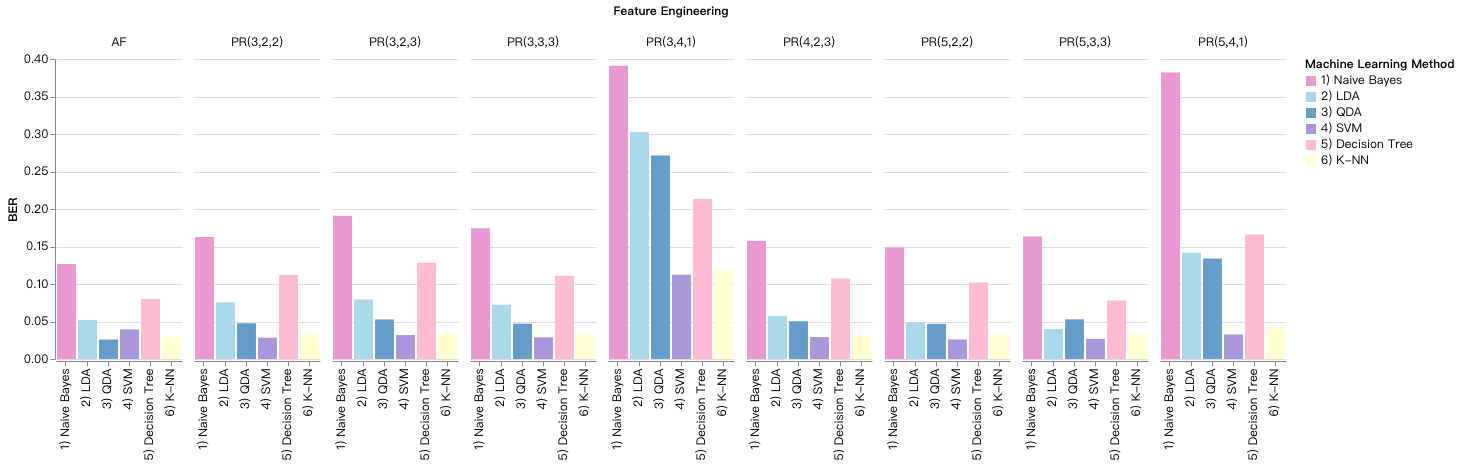

In [666]:
# Plot - Average BER on the whole test set

alt.renderers.enable('notebook')

chart = alt.Chart(df_plot_whole_test).mark_bar(stroke='transparent').encode(
   alt.X('Machine Learning Method', axis=alt.Axis(title='')),
   y='BER',
   color=alt.Color('Machine Learning Method', scale=alt.Scale(range=['#EA98D2', '#A8D8EA', '#659CCA', '#AA96DA', '#FCBAD3', '#FFFFD2'])),
   column='Feature Engineering',
).configure_view(
    stroke='transparent',
)

chart.display()

__Above: Average BER on the entire test set by feature engineering methods and classifiers__

In [647]:
# Leave-User-13-out on User 13 Test Set

# Aggregate Feature
af_ber_13 = np.array(af_ber_13_unseen)

# Pseudo-rasterized Feature
pr_541_ber_13 = np.array(pr_ber_13_unseen[0])
pr_323_ber_13 = np.array(pr_ber_13_unseen[1])
pr_322_ber_13 = np.array(pr_ber_13_unseen[2])
pr_341_ber_13 = np.array(pr_ber_13_unseen[3])
pr_423_ber_13 = np.array(pr_ber_13_unseen[4])
pr_533_ber_13 = np.array(pr_ber_13_unseen[5])
pr_522_ber_13 = np.array(pr_ber_13_unseen[6])
pr_333_ber_13 = np.array(pr_ber_13_unseen[7])

In [649]:
temp_list = []
for i in range(6):
    temp_list.append(['AF', af_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(5,4,1)', pr_541_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,3)', pr_323_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,2)', pr_322_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(3,4,1)', pr_341_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(4,2,3)', pr_423_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(5,3,3)', pr_533_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(5,2,2)', pr_522_ber_13[i], clf_name_list[i]])
    temp_list.append(['PR(3,3,3)', pr_333_ber_13[i], clf_name_list[i]])

df_plot_13 = pd.DataFrame(temp_list, columns=['Feature Engineering', 'BER', 'Machine Learning Method'])

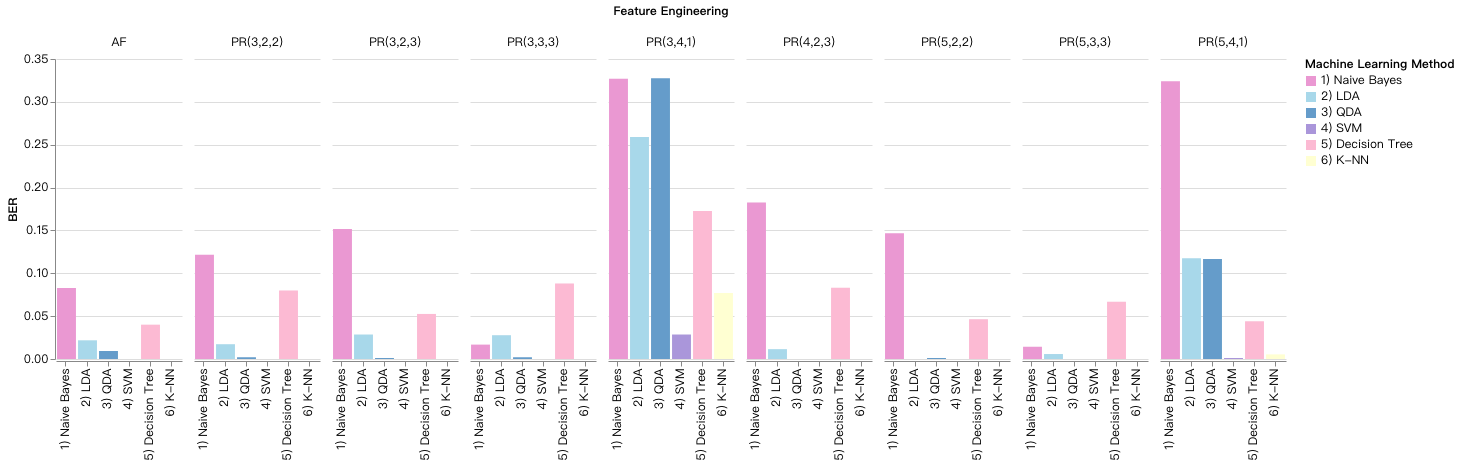

In [658]:
# Plot - Leave-User-13-Out BER on User 13

chart = alt.Chart(df_plot_13).mark_bar(stroke='transparent').encode(
   alt.X('Machine Learning Method', axis=alt.Axis(title='')),
   y='BER',
   color=alt.Color('Machine Learning Method', scale=alt.Scale(range=['#EA98D2', '#A8D8EA', '#659CCA', '#AA96DA', '#FCBAD3', '#FFFFD2'])),
   column='Feature Engineering'    
).configure_view(
    stroke='transparent',
)

chart.display()

__Above: Leave-User-13-Out BER on User 13 test set by feature engineering methods and classifiers__

In [651]:
# Leave-User-10-out on User 10 Test Set

# Aggregate Feature
af_ber_10 = np.array(af_ber_10_unseen)

# Pseudo-rasterized Feature
pr_541_ber_10 = np.array(pr_ber_10_unseen[0])
pr_323_ber_10 = np.array(pr_ber_10_unseen[1])
pr_322_ber_10 = np.array(pr_ber_10_unseen[2])
pr_341_ber_10 = np.array(pr_ber_10_unseen[3])
pr_423_ber_10 = np.array(pr_ber_10_unseen[4])
pr_533_ber_10 = np.array(pr_ber_10_unseen[5])
pr_522_ber_10 = np.array(pr_ber_10_unseen[6])
pr_333_ber_10 = np.array(pr_ber_10_unseen[7])

In [652]:
temp_list = []
for i in range(6):
    temp_list.append(['AF', af_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(5,4,1)', pr_541_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,3)', pr_323_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,2)', pr_322_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(3,4,1)', pr_341_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(4,2,3)', pr_423_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(5,3,3)', pr_533_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(5,2,2)', pr_522_ber_10[i], clf_name_list[i]])
    temp_list.append(['PR(3,3,3)', pr_333_ber_10[i], clf_name_list[i]])

df_plot_10 = pd.DataFrame(temp_list, columns=['Feature Engineering', 'BER', 'Machine Learning Method'])

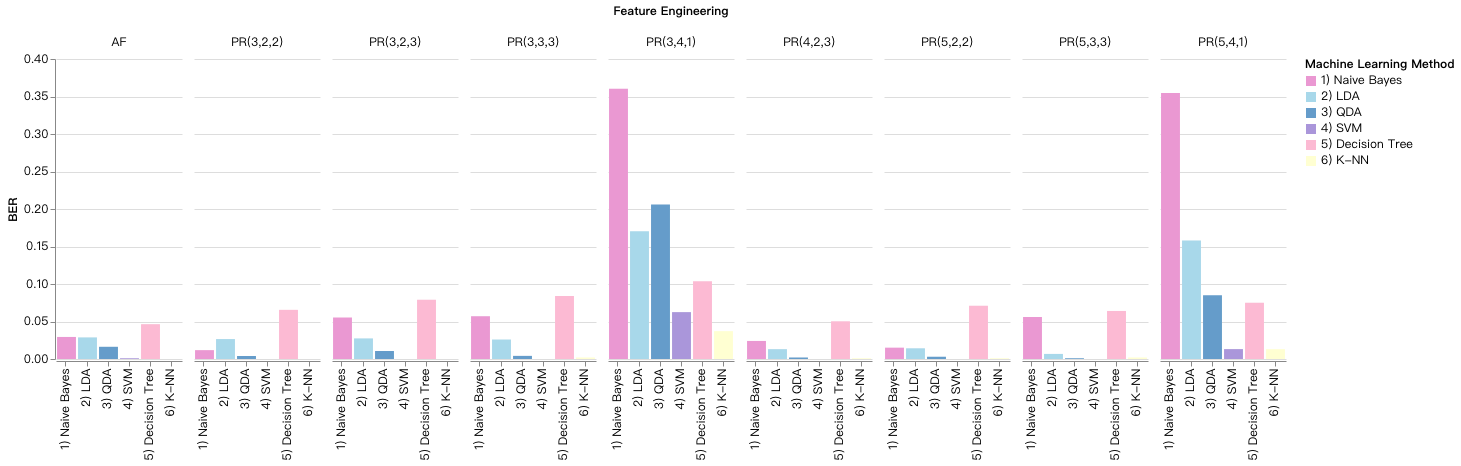

In [659]:
# Plot - Leave-User-10-Out BER on User 10

chart = alt.Chart(df_plot_10).mark_bar(stroke='transparent').encode(
   alt.X('Machine Learning Method', axis=alt.Axis(title='')),
   y='BER',
   color=alt.Color('Machine Learning Method', scale=alt.Scale(range=['#EA98D2', '#A8D8EA', '#659CCA', '#AA96DA', '#FCBAD3', '#FFFFD2'])),
   column='Feature Engineering'    
).configure_view(
    stroke='transparent',
)

chart.display()

__Above: Leave-User-10-Out BER on User 10 test set by feature engineering methods and classifiers__

In [654]:
# Leave-User-1-out on User 1 Test Set

# Aggregate Feature
af_ber_1 = np.array(af_ber_1_unseen)

# Pseudo-rasterized Feature
pr_541_ber_1 = np.array(pr_ber_1_unseen[0])
pr_323_ber_1 = np.array(pr_ber_1_unseen[1])
pr_322_ber_1 = np.array(pr_ber_1_unseen[2])
pr_341_ber_1 = np.array(pr_ber_1_unseen[3])
pr_423_ber_1 = np.array(pr_ber_1_unseen[4])
pr_533_ber_1 = np.array(pr_ber_1_unseen[5])
pr_522_ber_1 = np.array(pr_ber_1_unseen[6])
pr_333_ber_1 = np.array(pr_ber_1_unseen[7])

In [655]:
temp_list = []
for i in range(6):
    temp_list.append(['AF', af_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(5,4,1)', pr_541_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,3)', pr_323_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,2)', pr_322_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(3,4,1)', pr_341_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(4,2,3)', pr_423_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(5,3,3)', pr_533_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(5,2,2)', pr_522_ber_1[i], clf_name_list[i]])
    temp_list.append(['PR(3,3,3)', pr_333_ber_1[i], clf_name_list[i]])

df_plot_1 = pd.DataFrame(temp_list, columns=['Feature Engineering', 'BER', 'Machine Learning Method'])

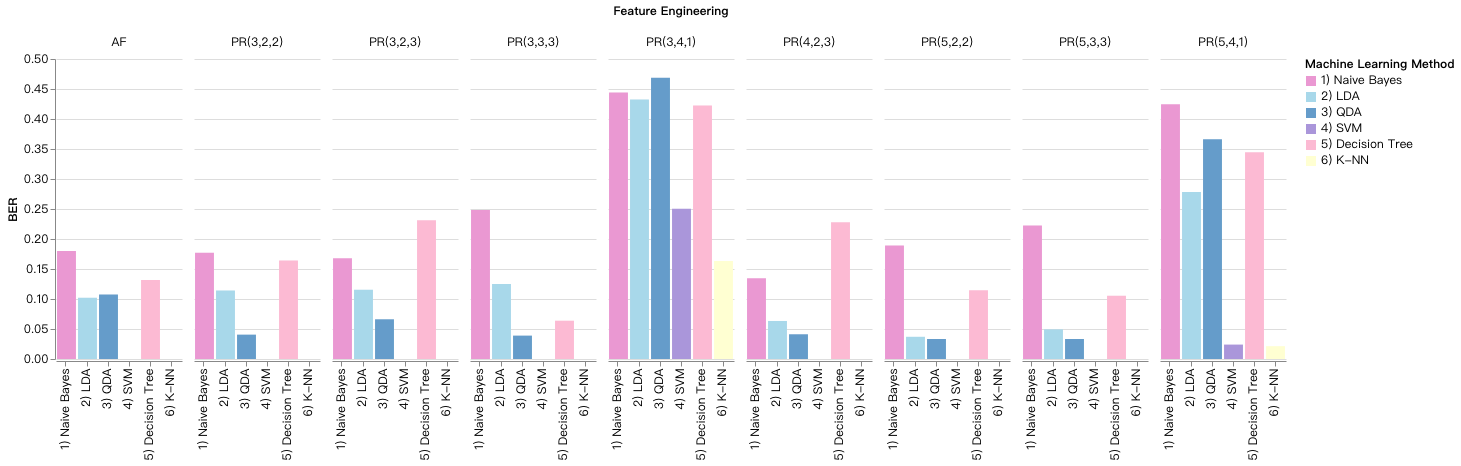

In [660]:
# Plot - Leave-User-1-Out BER on User 1

chart = alt.Chart(df_plot_1).mark_bar(stroke='transparent').encode(
   alt.X('Machine Learning Method', axis=alt.Axis(title='')),
   y='BER',
   color=alt.Color('Machine Learning Method', scale=alt.Scale(range=['#EA98D2', '#A8D8EA', '#659CCA', '#AA96DA', '#FCBAD3', '#FFFFD2'])),
   column='Feature Engineering'    
).configure_view(
    stroke='transparent',
)

chart.display()

__Above: Leave-User-1-Out BER on User 1 test set by feature engineering methods and classifiers__

In [661]:
# Leave-User-5-out on User 5 Test Set

# Aggregate Feature
af_ber_5 = np.array(af_ber_5_unseen)

# Pseudo-rasterized Feature
pr_541_ber_5 = np.array(pr_ber_5_unseen[0])
pr_323_ber_5 = np.array(pr_ber_5_unseen[1])
pr_322_ber_5 = np.array(pr_ber_5_unseen[2])
pr_341_ber_5 = np.array(pr_ber_5_unseen[3])
pr_423_ber_5 = np.array(pr_ber_5_unseen[4])
pr_533_ber_5 = np.array(pr_ber_5_unseen[5])
pr_522_ber_5 = np.array(pr_ber_5_unseen[6])
pr_333_ber_5 = np.array(pr_ber_5_unseen[7])

In [662]:
temp_list = []
for i in range(6):
    temp_list.append(['AF', af_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(5,4,1)', pr_541_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,3)', pr_323_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(3,2,2)', pr_322_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(3,4,1)', pr_341_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(4,2,3)', pr_423_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(5,3,3)', pr_533_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(5,2,2)', pr_522_ber_5[i], clf_name_list[i]])
    temp_list.append(['PR(3,3,3)', pr_333_ber_5[i], clf_name_list[i]])

df_plot_5 = pd.DataFrame(temp_list, columns=['Feature Engineering', 'BER', 'Machine Learning Method'])

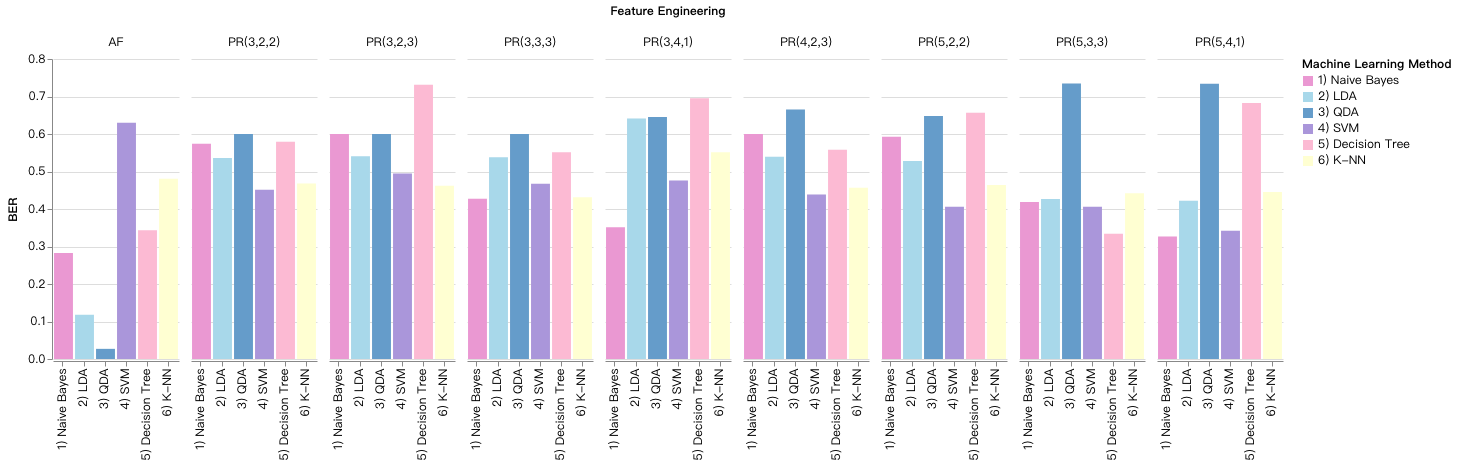

In [663]:
# Plot - Leave-User-5-Out BER on User 5

chart = alt.Chart(df_plot_5).mark_bar(stroke='transparent').encode(
   alt.X('Machine Learning Method', axis=alt.Axis(title='')),
   y='BER',
   color=alt.Color('Machine Learning Method', scale=alt.Scale(range=['#EA98D2', '#A8D8EA', '#659CCA', '#AA96DA', '#FCBAD3', '#FFFFD2'])),
   column='Feature Engineering'    
).configure_view(
    stroke='transparent',
)

chart.display()

__Above: Leave-User-5-Out BER on User 5 test set by feature engineering methods and classifiers__

## Analysis

The above plots offer significant insights into the feature engineering methods and machine learning algorithms that are employed in this project. Further, some unexpected observations are made and reveal issues that are present in the dataset and might impact the performance of the predictive models in practical use.

A collection of observations are listed as follows.

__Machine Learning Methods:__

I. According to the barplots above, we can observe that, in most of the test cases, Naive Bayes and Decision Tree fail to produce predictions with satisfactory accuracy, as their Balanced Error Rates exceed substantially those of the other four classifiers. The poor performance of the former can be attributed to the conditional independence assumption, which obviously does not hold in this case, while that of the latter might be due to overfitting since, during the training stage, cross-validation favored a little regularized decision tree classifier.

II. By far, the best classifiers are Support Vector Machine and K-Nearest Neighbors. These two classifiers almost always beat their peers, except in some rare cases like in the User 5 Test Set, where the entire results are abnormally off as a whole. In some test sets, such as in the User 13 Test Set and User 10 Test Set, the SVM and the K-NN even yield nearly perfect prediction (achieve a BER of 0 in many of the test results). Interestingly, in many cases, these two classifiers perform equally well. The excellent performance may be ascribed to the fact that the features are scaled prior to training and prediction, yet the exact underlying factor is unknown.

III. The Linear Discriminant Analysis and the Quadratic Disciminant Analysis are acceptable classifiers, as their overall performance lies between those in i) and those in ii). In some case they are even able to outperform all other competitors, like the QDA does in the User 5 Test Set. Nevertheless, they still fail to be ideal candidates in the competition for the best classifier, as the SVM and K-NN prove to be superior in most situations.

__Feature Engineering Methods:__

I. Surprisingly, the Aggregate Features proves itself a very strong candidate, as it manages to outperform most of the Pseudo-rasterized Features in most test cases. The Aggregate Features is a good proxy for the patterns behind different types of hand postures and is computationally inexpensive to implement at the same time.

II. For the Pseudo-rasterized Features, it turns out that the selection of the three parameters, $m$, $r$ and $f_{i}$, largely dictates how well the classifiers trained on these features will perform.

   i) The most influential parameter is $f_{i}$, i.e. the feature value function. Particularly, $f_{1}$ is an awful choice, as all test results in groups that employ $f_{1}$ illustrate astonishingly large error rate. The mostly likely reason is the oversimplicity of its computation; it is binary and ignores any positional context within in the sphere. $f_{2}$ and $f_{3}$ do not exhibit significant difference, as the plots suggest.
   
   ii) The test results imply that, the larger the $m$ (the number of spheres in a dimension) is, the better prediction we typically obtain. Equivalently, a finer grid is preferred as it is able to embrace more information.
   
   iii) The radius of the sphere, $r$, does not seem to be a significant factor compared to the two parameters mentioned above.
   
__Test Cases Analysis:__

Interestingly, many of the test case results in this project are unexpected and slightly counterintuitive, especially in the last four test cases, where we tested our leave-one-user-out classifiers on the corresponding left-out user. Intuitively, these test results are expected to be worse than the test on the entire test set. The logic behind this hypothesis is that, since the classifiers are asked to exclusively label observations produced by users that they have never been trained on, they have to deal with posture patterns with which they are unfamiliar and would thus produce poor prediction.

In reality, however, this is not the case. The tests across the four different groups exhibit starkly different results. In Group 1 (User 13) and Group 2 (User 10), the test results turn out to be much better than the average test on the whole test set. The test result in Group 3 (User 1) is roughly consistent with that on the whole test set. In Group 4 (User 5), we observe abyssmal test results that are way worse than the test on the whole test set. The tremendous variations in the test performance on different users imply that, the classifiers perform extremely well on some users, whereas they completely fail on other users. In other words, the classifiers are very sensitive to users.

The instability might be explained by the nature of the users. Some users tend to give postures in a fairly standard fashion, while other users may be very "creative" about this. Alternatively, the imbalance in the number of intances given by each users might play a role in the instability. The exact reason is still unclear.

## Conclusion

In this project, using two feature engineering methods to transform the raw data, we developed a wide variety of classifiers that, given a collection of 3-D coordinates, are able to classify the instance into one of the five types of hand postures. A thorough analysis with data visualization was provided and some observations that provide insights into the problems we face were made.

__Recommendation for Building Classifier:__

In accordance with the analysis section, we recommend that a classifier that uses Aggregate Features or Pseudo-rasterized Features with $m = 5$ and $f_{2}$ or $f_{3}$ as its feature value function and employs Support Machine Vector or K-Nearest Neighbors. The choice of feature engineering methods depends on the preference between accuracy and computational cost. A user that values accuracy more might find Pseudo-rasterized Features more desirable and vice versa.

__Application of the Hand Posture Classifier:__

Although the classifiers were developed in an experimental setting, there exist a number of potential fields that might benefit from the the hand posture classifiers or their theoretical basis. One of the possible applications is for training surgeons, who will conduct surgeries that require certain postures to be correctly positioned. The classifier may serve as a corrective tool for training purposes. Another application is for special nighttime military operations, where lights and oral commands are impossible due to the secrecy of the operations. The team lead might display a hand posture as a command and the soldiers will be able to interpret the hand posture using a classifier while remaining in dark and silence, minimizing the risk of being detected.